In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [2]:
url = 'https://fr.trustpilot.com/review/www.cdiscount.com'
html = requests.get(url)
html

<Response [200]>

In [3]:
# transformation de la page en un document exploitable
# Selon le parsers choisi (html.parser, lxml, lxml-xml, xml, html5lib)
soup = BeautifulSoup(html.text, 'html.parser')

# affichage de manière agencé avec la methode pretiffy
soup.prettify()

# Chercher à partir de la valeur d'une balise tous les éléments d'un commentaire
comment = soup.find_all('div', {"class" : "styles_cardWrapper__LcCPA styles_show__HUXRb styles_reviewCard__9HxJJ"})
print(comment[2].text)

MJMadame JACQUES7 avisFRIl y a 5 heuresSur invitationCliente depuis quelques annéesCliente depuis quelques années, toujours satisfaite, bons produits, si problème solution rapide et efficace. Je recommande Cdiscount autour de moi et il faut adhérer à Cdiscount à volonté on amorti très vite le coût de cette adhésion.Date de l'expérience: 15 novembre 2022Lire 2 avis de plus à propos de Cdiscount


In [4]:
# chercher dans la balise précédente les sous balises correspondant au pays, à la note et au commentaire

pays = comment[1].find('div', {"class" : "typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l styles_detailsIcon__Fo_ua"}).span.text
print(pays)

note = comment[1].find('div', {"class" : "styles_reviewHeader__iU9Px"})['data-service-review-rating']
print(note)

titre_commentaire = comment[1].find({"h2" : "typography_heading-s__f7029 typography_appearance-default__AAY17"}).text
print(titre_commentaire)

commentaire = comment[1].find('section', {"class" : "styles_reviewContentwrapper__zH_9M"}).text
print(commentaire)

FR
1
Entreprise qui pratique le f…
Actualisé il y a 18 minutesEntreprise qui pratique le f…Entreprise qui pratique le f…. de g……! Harcelé pour un problème entièrement de leur fait qui en réalité n’existe pas mais qu’ils sont totalement incapables de résoudre.Mais c’est le client qui est victime. Bravo le service après vente!!! Cdiscount zéro, Amazon 10/10 comparativement, certes un peu plus cher mais quel service. Morale: acceptez de payer un peu plus et soyez mieux considéré et surtout par des gens compétants.Date de l'expérience: 15 novembre 2022


In [2]:
from time import sleep
from time import time
t0 = time()

# recherche sur plusieurs pages
nb_pages = 6000
liste_url = []
page = 1
while page <= nb_pages :
    liste_url.append('https://fr.trustpilot.com/review/www.cdiscount.com?page='+str(page))
    page = page + 1

liste_pays = []
liste_note = []
liste_titre_commentaire = []
liste_commentaire = []

for url in liste_url:
    html = requests.get(url)
    soup = BeautifulSoup(html.text, 'html.parser')
    comment = soup.find_all('div', {"class" : "styles_cardWrapper__LcCPA styles_show__HUXRb styles_reviewCard__9HxJJ"})
    for nb_avis in range(len(comment)):
        liste_pays.append(comment[nb_avis].find('div', {"class" : "typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l styles_detailsIcon__Fo_ua"}).span.text)
        liste_note.append(comment[nb_avis].find('div', {"class" : "styles_reviewHeader__iU9Px"})['data-service-review-rating'])
        liste_titre_commentaire.append(comment[nb_avis].find({"h2" : "typography_heading-s__f7029 typography_appearance-default__AAY17"}).text)
        liste_commentaire.append(comment[nb_avis].find('section', {"class" : "styles_reviewContentwrapper__zH_9M"}).text)
    sleep(2)

dico = {'pays' : liste_pays, 'note' : liste_note, 'titre' : liste_titre_commentaire, 'commentaire' : liste_commentaire}
df = pd.DataFrame(dico)

print('le temps de calcul est de {:.2f} secondes'.format(time()-t0))

le temps de calcul est de 14875.31 secondes


In [3]:
df.shape

(120000, 4)

C:\Users\t.fourtouill\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='note', ylabel='count'>

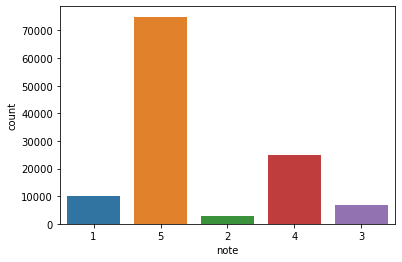

In [4]:
import seaborn as sns
sns.countplot(df['note'])

In [5]:
df.to_csv('datasets/SatisfactionClients/cdiscount.csv')